# HW-1

### Imports

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

### 1.

In [51]:
path_to_data = "owid-covid-data.csv"
data = pd.read_csv(path_to_data, parse_dates=True)

In [52]:
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [53]:
data = data[(data["location"] == "Russia") & (data["date"] >= "2020-03-03")]
data.set_index("date", inplace=True)

In [54]:
target = data[["total_cases", "new_cases"]]

# muting the useless warning
pd.options.mode.chained_assignment = None
target["new_cases"] = target["new_cases"].map(lambda value: value if value > 0 else 1)

In [55]:
CARDINALITY_OF_TRAIN = 50

train_data = data[:CARDINALITY_OF_TRAIN]
test_data = data[CARDINALITY_OF_TRAIN:]

train_target = target[:CARDINALITY_OF_TRAIN]
test_target = target[CARDINALITY_OF_TRAIN:]

### 2.

Plotting train data

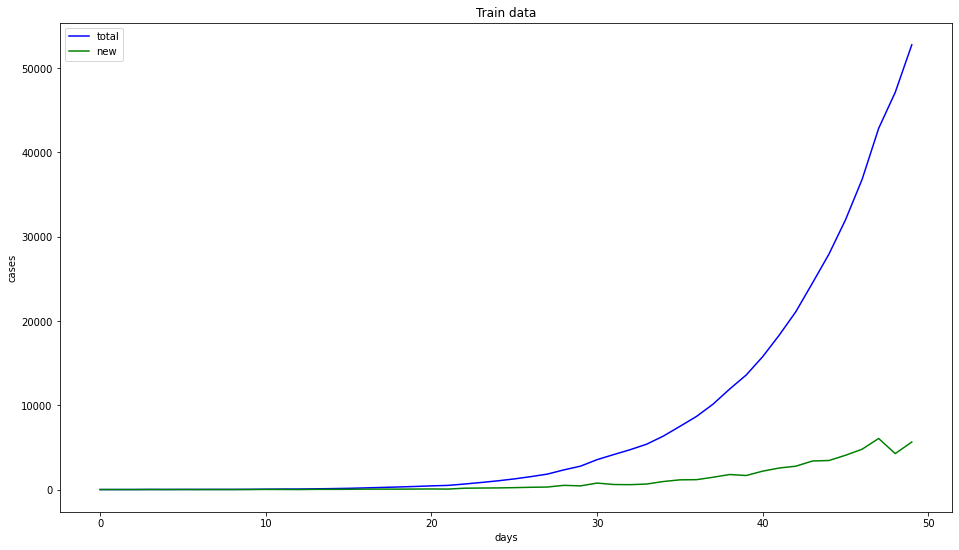

In [56]:
plt.figure(figsize=(16, 9))

plt.plot(range(len(train_target.index)), train_target["total_cases"], label="total", color="blue")
plt.plot(range(len(train_target.index)), train_target["new_cases"], label="new", color="green")

plt.xlabel("days")
plt.ylabel("cases")
plt.title("Train data")

plt.legend()
plt.show()

Plotting full data

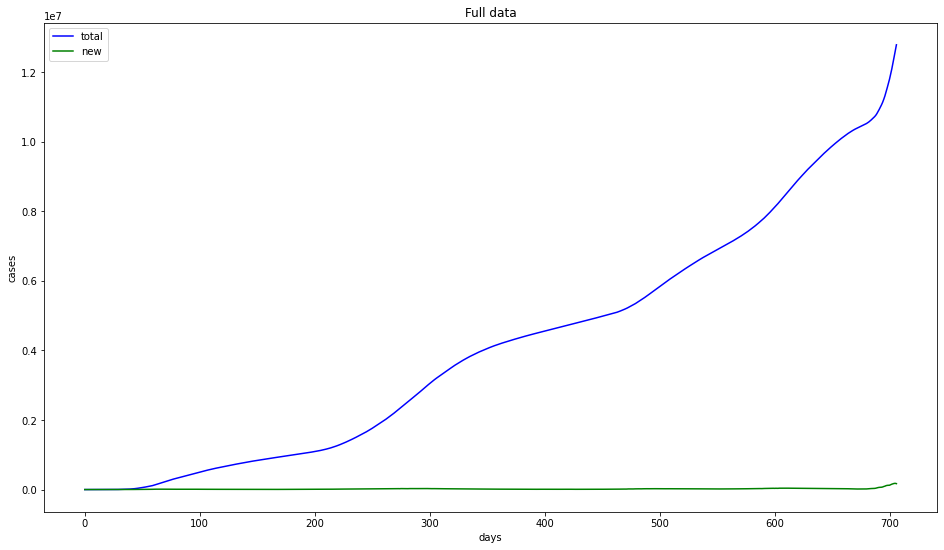

In [57]:
plt.figure(figsize=(16, 9))

plt.plot(range(len(data.index)), data["total_cases"], label="total", color="blue")
plt.plot(range(len(data.index)), data["new_cases"], label="new", color="green")

plt.xlabel("days")
plt.ylabel("cases")
plt.title("Full data")

plt.legend()
plt.show()

y ~ exp(w * x + b);  
y = C1 * exp(w * x + b);  
ln(y) = ln(C1) + w * x + b;  
let C2 = ln(C1) + b and g = ln(y), then y = exp(g);  
g = w * x + C2.